<a href="https://colab.research.google.com/github/rushi-k12/Data_Cleaning/blob/main/clean_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Ditry Data Sample.csv")

In [3]:
df

,Segment>>,Consumer,Unnamed: 2,Unnamed: 3,Unnamed: 4,Consumer Total,Corporate,Unnamed: 7,Unnamed: 8,Unnamed: 9,Corporate Total,Home Office,Unnamed: 12,Unnamed: 13,Unnamed: 14,Home Office Total
0,Ship Mode>>,First Class,Same Day,Second Class,Standard Class,NaN,First Class,Same Day,Second Class,Standard Class,NaN,First Class,Same Day,Second Class,Standard Class,NaN
1,Order ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA-2011-100293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056,91.0560
3,CA-2011-100706,NaN,NaN,129.44,NaN,129.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CA-2011-100895,NaN,NaN,NaN,605.47,605.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,US-2014-166611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.742,68.7420,NaN,NaN,NaN,NaN,NaN
821,US-2014-167920,NaN,NaN,1827.51,NaN,1827.510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,US-2014-168116,NaN,NaN,NaN,NaN,NaN,NaN,8167.42,NaN,NaN,8167.4200,NaN,NaN,NaN,NaN,NaN
823,US-2014-168690,NaN,NaN,NaN,2.808,2.808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Segment>>', 'Consumer', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Consumer Total', 'Corporate', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Corporate Total', 'Home Office', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Home Office Total'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Segment>>          825 non-null    object 
 1   Consumer           74 non-null     object 
 2   Unnamed: 2         30 non-null     object 
 3   Unnamed: 3         93 non-null     object 
 4   Unnamed: 4         255 non-null    object 
 5   Consumer Total     445 non-null    float64
 6   Corporate          42 non-null     object 
 7   Unnamed: 7         7 non-null      object 
 8   Unnamed: 8         52 non-null     object 
 9   Unnamed: 9         154 non-null    object 
 10  Corporate Total    248 non-null    float64
 11  Home Office        14 non-null     object 
 12  Unnamed: 12        8 non-null      object 
 13  Unnamed: 13        25 non-null     object 
 14  Unnamed: 14        92 non-null     object 
 15  Home Office Total  132 non-null    float64
dtypes: float64(3), object(13)


In [6]:
df.describe()

,Consumer Total,Corporate Total,Home Office Total
count,445.000000,248.000000,132.000000
mean,879.015600,982.951069,1125.075780
std,9285.318749,7761.266452,6753.344616
min,2.064000,1.167000,3.444000
25%,36.192000,31.066500,35.820000
50%,173.940000,158.252000,150.060000
75%,517.500000,583.518500,530.497500
max,195580.971000,121885.932500,74255.001500


In [7]:
# Extract the first two rows for headers
headers = df.iloc[0:2]

# Fill NaN values with empty strings
headers = headers.fillna('')

# Combine the two rows to form a single header row
new_headers = headers.apply(lambda x: ' '.join(x).strip(), axis=0)

# Assign the new headers to the dataframe
df.columns = new_headers

# Drop the original header rows
df = df.drop([0, 1])


In [8]:
# Drop columns that are not needed
# Example: Drop columns that start with "Unnamed" as they appear to be empty or placeholders
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [9]:
# Drop rows with all NaN values
df = df.dropna(how='all')

# Forward fill or backward fill can be used if appropriate for your data
# df = df.fillna(method='ffill')
# df = df.fillna(method='bfill')

# Example: Replace NaN with 0 in numerical columns
df = df.fillna(0)


In [10]:
df.head()

,Ship Mode>> Order ID,First Class,Same Day,Second Class,Standard Class,,First Class,Same Day,Second Class,Standard Class,,First Class,Same Day,Second Class,Standard Class,
2,CA-2011-100293,0,0,0,0,0.00,0,0,0,0,0.00,0,0,0,91.056,91.056
3,CA-2011-100706,0,0,129.44,0,129.44,0,0,0,0,0.00,0,0,0,0,0.000
4,CA-2011-100895,0,0,0,605.47,605.47,0,0,0,0,0.00,0,0,0,0,0.000
5,CA-2011-100916,0,0,0,0,0.00,0,0,0,788.86,788.86,0,0,0,0,0.000
6,CA-2011-101266,0,0,13.36,0,13.36,0,0,0,0,0.00,0,0,0,0,0.000


In [12]:
df.columns

Index(['Ship Mode>> Order ID', 'First Class', 'Same Day', 'Second Class',
       'Standard Class', '', 'First Class', 'Same Day', 'Second Class',
       'Standard Class', '', 'First Class', 'Same Day', 'Second Class',
       'Standard Class', ''],
      dtype='object')

In [15]:
df.rename(columns={'Ship Mode>> Order ID':'Order ID'})

,Order ID,First Class,Same Day,Second Class,Standard Class,,First Class,Same Day,Second Class,Standard Class,,First Class,Same Day,Second Class,Standard Class,
2,CA-2011-100293,0,0,0,0,0.000,0,0,0,0,0.0000,0,0,0,91.056,91.0560
3,CA-2011-100706,0,0,129.44,0,129.440,0,0,0,0,0.0000,0,0,0,0,0.0000
4,CA-2011-100895,0,0,0,605.47,605.470,0,0,0,0,0.0000,0,0,0,0,0.0000
5,CA-2011-100916,0,0,0,0,0.000,0,0,0,788.86,788.8600,0,0,0,0,0.0000
6,CA-2011-101266,0,0,13.36,0,13.360,0,0,0,0,0.0000,0,0,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,US-2014-166611,0,0,0,0,0.000,0,0,0,68.742,68.7420,0,0,0,0,0.0000
821,US-2014-167920,0,0,1827.51,0,1827.510,0,0,0,0,0.0000,0,0,0,0,0.0000
822,US-2014-168116,0,0,0,0,0.000,0,8167.42,0,0,8167.4200,0,0,0,0,0.0000
823,US-2014-168690,0,0,0,2.808,2.808,0,0,0,0,0.0000,0,0,0,0,0.0000


In [17]:
df.columns = ['Order ID', 'First Class Consumer', 'Same Day Consumer', 'Second Class Consumer', 'Standard Class Consumer',
              'Consumer Total', 'First Class Corporate', 'Same Day Corporate', 'Second Class Corporate', 'Standard Class Corporate',
              'Corporate Total', 'First Class Home Office', 'Same Day Home Office', 'Second Class Home Office', 'Standard Class Home Office',
              'Home Office Total']

In [19]:
df

,Order ID,First Class Consumer,Same Day Consumer,Second Class Consumer,Standard Class Consumer,Consumer Total,First Class Corporate,Same Day Corporate,Second Class Corporate,Standard Class Corporate,Corporate Total,First Class Home Office,Same Day Home Office,Second Class Home Office,Standard Class Home Office,Home Office Total
2,CA-2011-100293,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,91.0560,91.0560
3,CA-2011-100706,0.000,0.000,129.4400,0.0000,129.440,0.000,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,0.0000,0.0000
4,CA-2011-100895,0.000,0.000,0.0000,605.4700,605.470,0.000,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,0.0000,0.0000
5,CA-2011-100916,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,788.8600,788.8600,0.000,0.000,0.000,0.0000,0.0000
6,CA-2011-101266,0.000,0.000,13.3600,0.0000,13.360,0.000,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,US-2014-166611,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,68.7420,68.7420,0.000,0.000,0.000,0.0000,0.0000
821,US-2014-167920,0.000,0.000,1827.5100,0.0000,1827.510,0.000,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,0.0000,0.0000
822,US-2014-168116,0.000,0.000,0.0000,0.0000,0.000,0.000,8167.420,0.000,0.0000,8167.4200,0.000,0.000,0.000,0.0000,0.0000
823,US-2014-168690,0.000,0.000,0.0000,2.8080,2.808,0.000,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,0.0000,0.0000


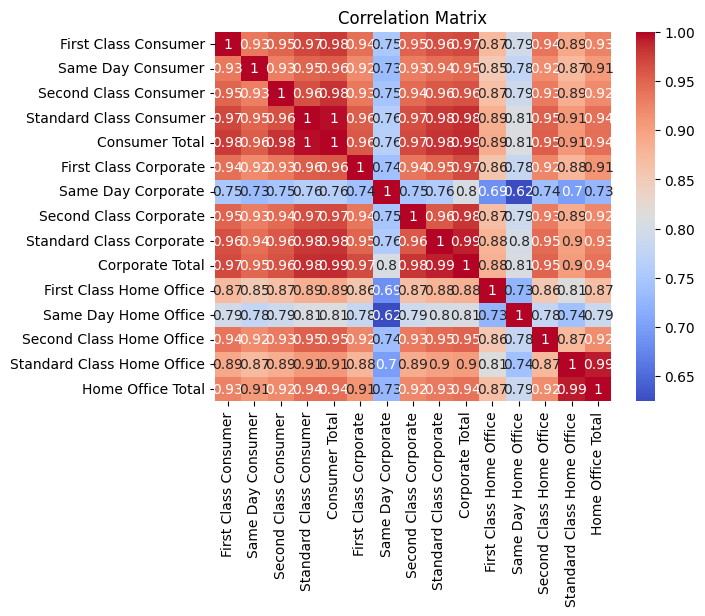

<ipython-input-21-f9c80c1d4075>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Second Class Consumer', data=df, palette='Set3')


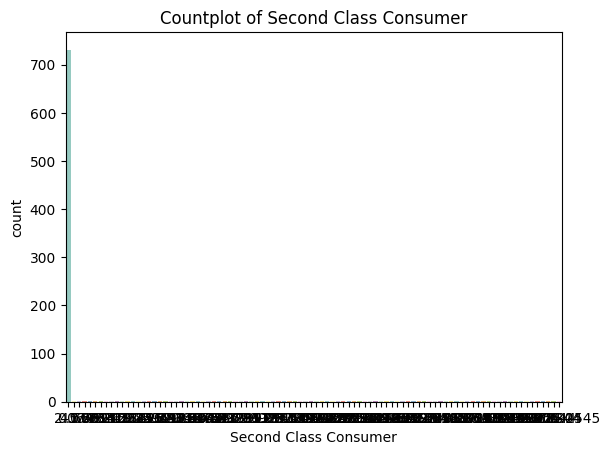

In [21]:
# Convert appropriate columns to numeric (if not already done)
numeric_columns = df.columns.drop('Order ID')
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Example visualization (countplot)
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a heatmap to see the correlations
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Example of a count plot for 'Second Class Consumer'
sns.countplot(x='Second Class Consumer', data=df, palette='Set3')
plt.title("Countplot of Second Class Consumer")
plt.show()